In [1]:
#Import libraries
from numpy import *
from scipy.sparse import diags
from matplotlib import animation as animation
from matplotlib import pyplot 
from scipy.integrate import odeint
from random import *
from pylab import *

#plot inline
%matplotlib inline

In [2]:
# parametros
lamda=0.1
gama=1
K=3

#finite difference approximations steps
#dx=0.25
#dt=0.25

#end of time and space arrays
T=150
R=350

#size of the arrays
m=500#int(T/dt)
n=500#int(R/dx)


#time array
t=linspace(0,T,m,endpoint=True)

#space array
x=linspace(0,R,n,endpoint=True)

dt=t[1]-t[0]
dx=x[1]-x[0]


In [3]:
#Initializes sol. matrix with initial conditions
def initCN(x,t):    
    m=len(t)
    n=len(x)
    
    C=zeros((m,n))
    N=zeros((m,n))
    
    #Initial conditions
    C[0,:]=array([1 if k<100 else 0 for k in x])
    N[0,:]=array([0 for k in x ])
    return [C,N]

In [4]:
def fieldC(c,t,n,D):
    dc=D*dot(L,transpose(c))+c*(1-c-gama*n)-lamda*c*(1-K*n)
    
    return dc

def fieldN(n,t,c):
    dn=lamda*c*(1-K*n)
    
    return dn

# Considerando difusión

In [5]:
#Constructs sparse matrix
def discretizationMatrix(dx,m,n):
    diagonals=[]
    
    diagonals.append(ones((1,n))[0]*(-2/pow(dx,2)))
    diagonals.append((ones((1,n-1))[0])*(1/pow(dx,2)))
    diagonals.append((ones((1,n-1))[0])*(1/pow(dx,2)))
    diagonals.append(zeros((1,n-2))[0])
    diagonals.append(zeros((1,n-2))[0])
    
    diagonals[2][n-2]=2/pow(dx,2)
    diagonals[2][n-2]=2/pow(dx,2)
    
    L=diags(diagonals,[0,-1,1,2,-2])*eye(n)
    
    return L

In [6]:
def solveODE(n,t,D):   
    C=CN[0]
    N=CN[1]
    
    C_sol=odeint(fieldC,C[0,:],t,args=(N[0,:],D))
    N_sol=odeint(fieldN,N[0,:],t,args=(C[0,:],))
    
    return [C_sol,N_sol]

In [7]:
CN=initCN(x,t)
L=discretizationMatrix(dx,m,n)

In [8]:
CN_sol=solveODE(n,t,1)

In [9]:
C_sol=CN_sol[0]
N_sol=CN_sol[1]

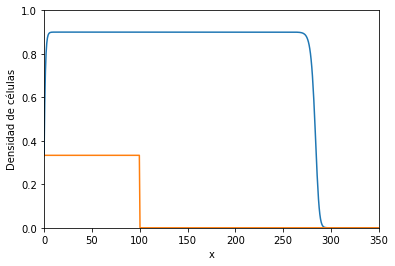

In [12]:
fig=plt.figure()
xlim(0,350)
ylim(0,1)
xlabel('x')
ylabel('Densidad de células')
plot(x,C_sol[333],x,N_sol[400])
savefig('./images/prueba.png')

In [ ]:
lamdas=[0.1,0.2,1,10]
dc_sols=[]
dn_sols=[]

fig5=figure()
xlim(0,350)
ylim(0,1)
xlabel("x")
ylabel("Densidad de células")

for l in lamdas:
    lamda=l
    CN_sol=solveODE(n,t,1)
    
    dc_sol=CN_sol[0]
    dn_sol=CN_sol[1]
    
    plot(x,dc_sol[333])

In [ ]:
t[333]

# Sin difusión

In [ ]:
def field(CN,t):
    c=CN[0]
    n=CN[1]
    
    C=c*(1-c-gama*n)-lamda*c*(1-K*n)
    N=lamda*c*(1-K*n)
    
    return [C,N]


In [ ]:
#steady states
xstar=[0,0]
#xstar = [1-1/K,1/K]]

In [ ]:
def init_cond(xstar,eps,n):
    xinit = xstar + eps*rand(n,2)
    
    return xinit

In [ ]:
init_state=init_cond(xstar,0.3,1)[0]
sol=odeint(field,init_state,t)
#sol=odeint(field,[1,0],t)

In [ ]:
k=len(sol[:,0])
xx=linspace(0,1,k)
yy=linspace(0,1,k)

#nullclines
nn_c=lamda*k*xx+1-lamda


fig=figure()
xlabel("celulas precursoras $(c)$")
ylabel("celulas diferenciadas(n)")
#xlim(0.93,1.001)
#ylim(-0.01,0.35)

# plot c vs n
plot(sol[:,0],sol[:,1],'b-')


In [ ]:
fig2=figure()
xlabel("t")
ylabel("c,n")
xlim(0,150)
ylim(0,1.1)
plot(t,sol[:,0],t,sol[:,1])

In [ ]:
fig3=figure()
xlim(0,150)
plot(t,C_sol[:,142],t,N_sol[:,142])